In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression

In [2]:
url = 'https://itl.nist.gov/div898/strd/nls/data/LINKS/DATA/Hahn1.dat'
df = pd.read_csv(url, skiprows=60, sep=' ',skipinitialspace=True, names=['y0','x0','dummy'])
df.head()

,y0,x0,dummy
0,0.591,24.41,NaN
1,1.547,34.82,NaN
2,2.902,44.09,NaN
3,2.894,45.07,NaN
4,4.703,54.98,NaN


Text(0, 0.5, 'y')

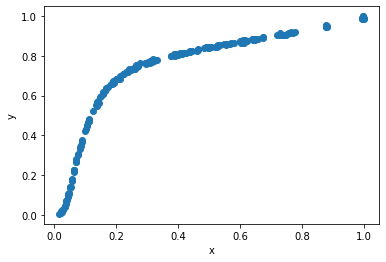

In [3]:
# TODO 1
x0 = np.array(df['x0'])
y0 = np.array(df['y0'])
x = x0/np.max(x0)
y = y0/np.max(y0)
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y with noise')

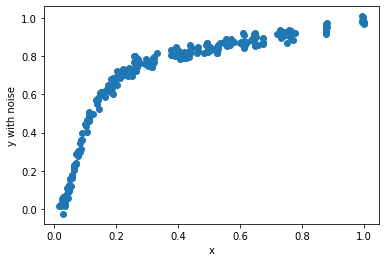

In [4]:
# TODO 2
nsamp = y.shape[0]
wstd = 0.02
yn = y + np.random.normal(0,wstd,nsamp)
plt.plot(x,yn,'o')
plt.xlabel('x')
plt.ylabel('y with noise')

In [5]:
from sklearn.model_selection import train_test_split

# TODO 3
xtr, xts, ytr, yts = train_test_split(x,yn,test_size = 0.33)

In [6]:
def predict(w,x):
    
    # Get the length
    d = (len(w)-1)//2
    
    # TODO 4.  Extract a and b from w
    a = w[:d+1]
    b = w[-d:]
    
    # TODO 5.  Compute yhat.  You may use the np.polyval function
    # But, remember you must flip the order the a and b
    vala = 0
    valb = 1
    for i in range(0,d+1):
      vala += a[i] * (x**i)
    for i in range(0,d):
      valb += b[i] * (x**(i+1))
    yhat = vala / valb
    return yhat

In [7]:
d = 3

# TODO 6.  Create the transformed feature matrix
n = xtr.shape[0]
Z = np.zeros((n,2*d))

for i in range(n):
  for j in range(d):
    Z[i,j] = xtr[i]**(j+1)
    Z[i,j+d] = ytr[i] * (xtr[i]**(j+1))

# TODO 7.  Fit with parameters with linear regression
regr = LinearRegression()
regr.fit(Z,ytr)

# TODO 8
# Extract the parameters from regr.coef_ and regr.intercept_ and store the parameter vector in winit
W = regr.coef_.ravel()
npar = len(W)
winit = np.array(npar+1)
winit = np.hstack((regr.intercept_,W))

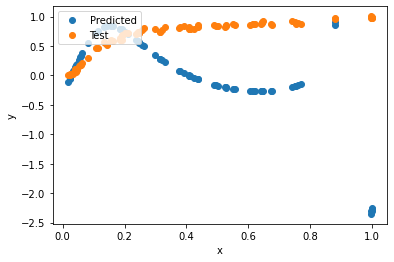

In [8]:
# TODO 9
nts = xts.shape[0]
Z_ts = np.zeros((nts,2*d))
for i in range(nts):
  for j in range(d):
    Z_ts[i,j] = xts[i]**(j+1)
    Z_ts[i,j+d] = yts[i] * (xts[i]**(j+1))

xp = np.linspace(0,1,1000)
yhat = predict(winit,xts)
plt.plot(xts,yhat,'o',label = "Predicted")
plt.plot(xts,yts,'o',label = "Test")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="upper left")

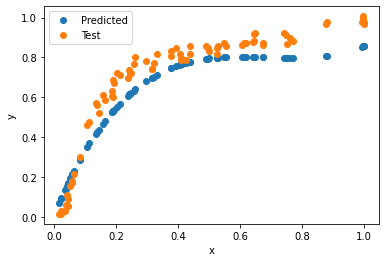

In [9]:
# TODO 10.  Fit with parameters with linear regression
regr = Ridge(alpha=1e-3)
regr.fit(Z,ytr)

# TODO 11
# Extract the parameters from regr.coef_ and regr.intercept_
Wnew = regr.coef_.ravel()
npar = len(Wnew)
winit = np.array(npar+1)
winit = np.hstack((regr.intercept_,Wnew))

# TODO 12
# Plot the results as above.
yhat_new = predict(winit,xts)
plt.plot(xts,yhat_new,'o',label = "Predicted")
plt.plot(xts,yts,'o',label = "Test")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="upper left")

In [10]:
def feval(w,x,y):

    # TODO 13.  Parse w
    a = w[:d+1]
    b = w[-d:]
    
    # TODO 14.  Znum[i,j] = x[i]**j
    nx = x.shape[0]
    ny = y.shape[0]
    Znum = np.zeros((nx,d+1))
    numerator = np.zeros(nx)
    Zden = np.zeros((nx,d))
    denominator = np.ones(nx)
    for i in range(nx):
      for j in range(d+1):
        Znum[i,j] = x[i]**j
        numerator[i] += a[j] * Znum[i,j]

    # TODO 15.  Zden[i,j] = x[i]**(j+1)
    for i in range(nx):
      for j in range(d):
        Zden[i,j] = x[i]**(j+1)
        denominator[i] += b[j] * Zden[i,j]
    
    # TODO 16.  Compute yhat 
    # Compute the numerator and denominator

    yhat = numerator/denominator

    # TODO 17.  Compute loss
    sum = 0
    for i in range(nx):
      sum = sum + (y[i]-yhat[i])**2
    f = 0.5 * sum

    # TODO 18.  Compute gradients
    df_dw = np.zeros((nx,2*d+1))
    for i in range(nx):
      for j in range(2*d+1):
        if j<=d:
          df_dw[i,j] = ((x[i]**j) * denominator[i])/denominator[i]**2
        else:
          df_dw[i,j] = -((x[i]**(j-d)) * numerator[i])/denominator[i]**2

    df_dy = yhat-y
    fgrad = df_dw.T.dot(df_dy)
    return f, fgrad

In [11]:
# TODO 19
w0 = winit
f0,fgrad0 = feval(w0,xtr,ytr)
step = 1e-6
p = w0.shape[0]
w1 = w0 + step*np.random.randn(p)
f1,fgrad1 = feval(w1,xtr,ytr)
df_est = fgrad0.dot(w1-w0)
print("Actual f1-f0    = {}".format(f1-f0))
print("Predicted f1-f0 = {}".format(df_est))

Actual f1-f0    = 1.941921044756878e-05
Predicted f1-f0 = 1.9418852780586682e-05


Text(0, 0.5, 'Training loss')

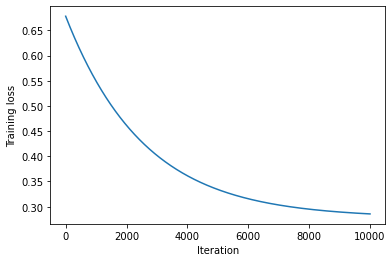

In [12]:
# TODO 20
nit = 10000
step = 1e-6

def grad_opt_simp(feval,winit,lr,nit):
    w0 = winit
    hist = {'w': [], 'f': []}
    for it in range(nit):
        f0, fgrad0 = feval(w0,xtr,ytr)
        w0 = w0 - lr*fgrad0
        hist['f'].append(f0)
        hist['w'].append(w0)
    for elem in ('f', 'w'):
        hist[elem] = np.array(hist[elem])
    return w0, f0, hist
w, f0, fgd = grad_opt_simp(feval,winit,step,nit)
xp = np.linspace(0,nit,nit)
plt.plot(xp,fgd['f'])
plt.xlabel('Iteration')
plt.ylabel('Training loss')

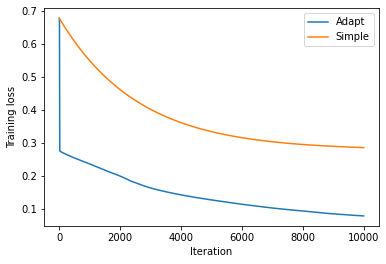

In [13]:
# TODO 21
nit = 10000
step = 1e-6
lr_min=1e-9
def grad_opt_adapt(feval, winit, nit, lr_init, lr_min):

    w0 = winit
    f0, fgrad0 = feval(w0,xtr,ytr)
    lr = lr_init
    hist = {'lr': [], 'w': [], 'f': []}

    for it in range(nit):
        w1 = w0 - lr*fgrad0

        f1, fgrad1 = feval(w1,xtr,ytr)
        df_est = fgrad0.dot(w1-w0)

        alpha = 0.5
        if (f1-f0 < alpha*df_est) and (f1 < f0):
            lr = lr*2
            f0 = f1
            fgrad0 = fgrad1
            w0 = w1
        else:
            lr = lr/2
            lr = np.maximum(lr, lr_min)

        hist['f'].append(f0)
        hist['lr'].append(lr)
        hist['w'].append(w0)

    for elem in ('f', 'lr', 'w'):
        hist[elem] = np.array(hist[elem])
    return w0, f0, hist
w, f0, fadapt = grad_opt_adapt(feval, winit, nit, step,lr_min)
xp = np.linspace(0,nit,nit)
plt.plot(xp,fadapt['f'],label="Adapt")
plt.plot(xp,fgd['f'],label="Simple")
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.legend(loc='upper right')

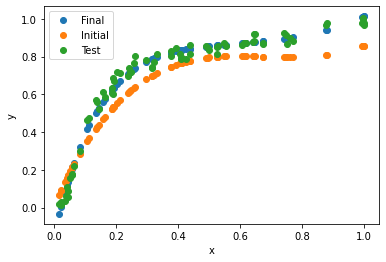

In [14]:
# TODO 22
xp = np.linspace(0,1,1000)
yhat = predict(w,xts)
plt.plot(xts,yhat,'o',label="Final")
yhat_w = predict(winit,xts)
plt.plot(xts,yhat_w,'o',label="Initial")
plt.plot(xts,yts,'o',label="Test")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')

In [17]:
# TODO 23
nit = 1000
step = 1e-3
beta = 0.99
fmom = np.zeros(nit)
def grad_opt_simp(feval,winit,lr,nit,beta):
    w0 = winit
    z = 0
    hist = {'w': [], 'f': []}
    for it in range(nit):
        f0, fgrad0 = feval(w0,xtr,ytr)
        z = beta*z + fgrad0
        w0 = w0 - lr*z
        hist['f'].append(f0)
        hist['w'].append(w0)
    for elem in ('f', 'w'):
        hist[elem] = np.array(hist[elem])
    return w0, f0, hist
w, f0,fmom = grad_opt_simp(feval,winit,step,nit,beta)

Text(0, 0.5, 'Training loss')

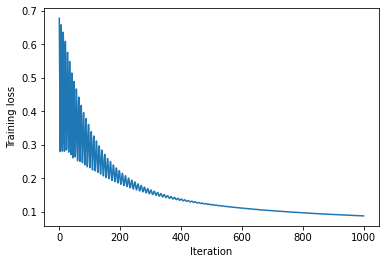

In [18]:
# TODO 24
# plot yhat vs. x
xp = np.linspace(0,nit,nit)
plt.plot(xp,fmom['f'])
plt.xlabel('Iteration')
plt.ylabel('Training loss')